In [3]:
!pip install gdown

import numpy as np
file_url = "https://drive.google.com/uc?id=180FkupJQe0Oiq0A1yJg4m5Ggbfw-G8Sc"
!gdown {file_url} -O data.npy


Downloading...
From: https://drive.google.com/uc?id=180FkupJQe0Oiq0A1yJg4m5Ggbfw-G8Sc
To: /content/data.npy
100% 928/928 [00:00<00:00, 3.87MB/s]


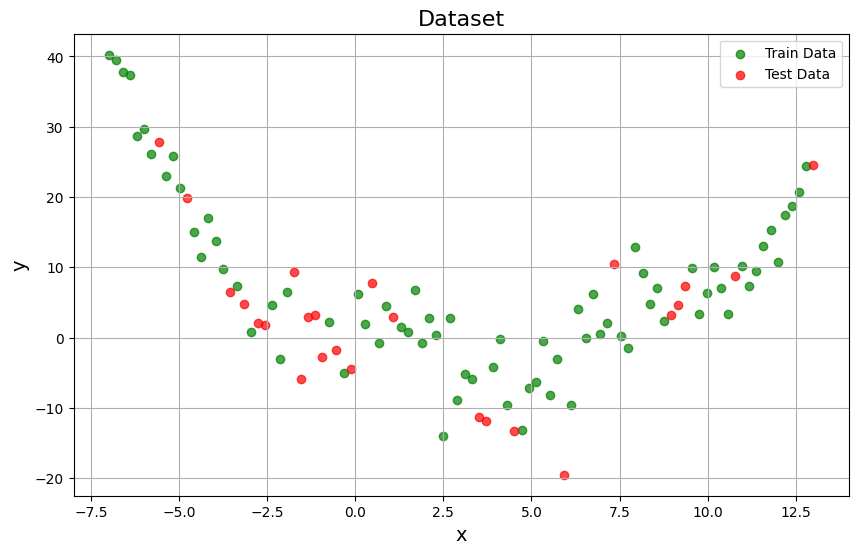

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_data = np.load("data.npy")
x_data = np.linspace(-7, 13, len(y_data))
data = pd.DataFrame({'x': x_data, 'y': y_data})

test_size = int(0.25 * len(data))
test_indices = np.random.choice(data.index, size=test_size, replace=False)
test_data = data.loc[test_indices]
train_data = data.drop(test_indices)

plt.figure(figsize=(10, 6))
plt.scatter(train_data['x'], train_data['y'], color='green', label='Train Data', alpha=0.7)
plt.scatter(test_data['x'], test_data['y'], color='red', label='Test Data', alpha=0.7)

plt.title("Dataset", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


  Metric       Train        Test
0    MSE  130.726190  155.974537
1    MRE    4.509264    1.924903
2   RMSE   11.433555   12.488977


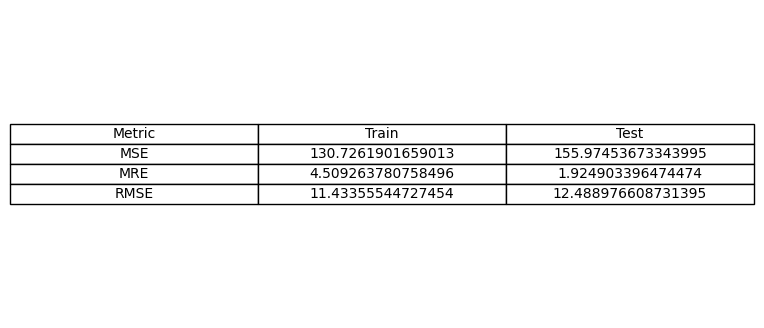

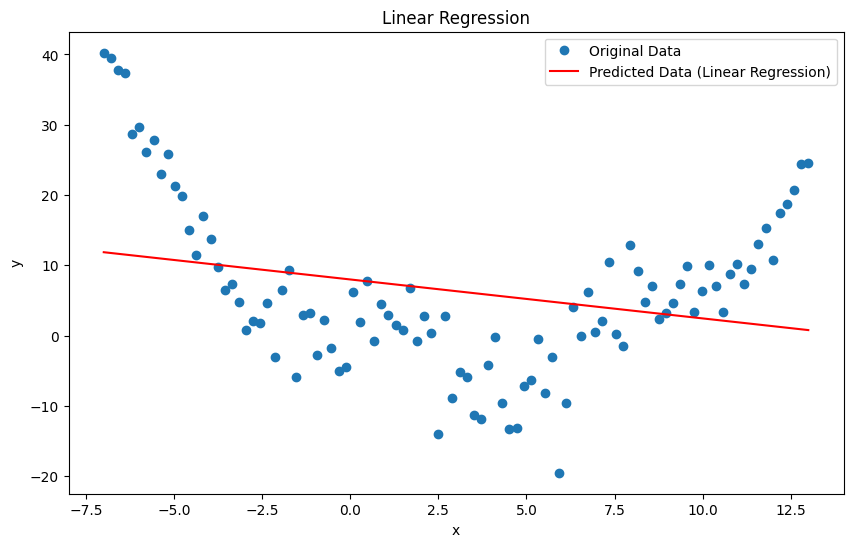

In [47]:
train_indices = np.setdiff1d(np.arange(len(x_data)), test_indices)

x_train, y_train = x_data[train_indices], y_data[train_indices]
x_test, y_test = x_data[test_indices], y_data[test_indices]

X_train = x_train.reshape(-1, 1)
X_test = x_test.reshape(-1, 1)
Y_train = y_train.reshape(-1, 1)
Y_test = y_test.reshape(-1, 1)

x_mean_train = np.mean(x_train)
y_mean_train = np.mean(y_train)

numerator = np.sum((x_train - x_mean_train) * (y_train - y_mean_train))
denominator = np.sum((x_train - x_mean_train) ** 2)
w = numerator / denominator
b = y_mean_train - w * x_mean_train

y_train_pred = w * x_train + b
y_test_pred = w * x_test + b

mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)
mre_train = np.mean(np.abs((y_train - y_train_pred) / y_train))
mre_test = np.mean(np.abs((y_test - y_test_pred) / y_test))
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

metrics = ['MSE', 'MRE', 'RMSE']
train_metrics = [mse_train, mre_train, rmse_train]
test_metrics = [mse_test, mre_test, rmse_test]

results_df = pd.DataFrame({
    'Metric': metrics,
    'Train': train_metrics,
    'Test': test_metrics
})

print(results_df)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
tbl = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Original Data')
plt.plot(x_data, y_pred, 'r-', label='Predicted Data (Linear Regression)')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



<ipython-input-52-2c8d186c8f91>:34: RuntimeWarning: invalid value encountered in scalar divide
  w = numerator / denominator


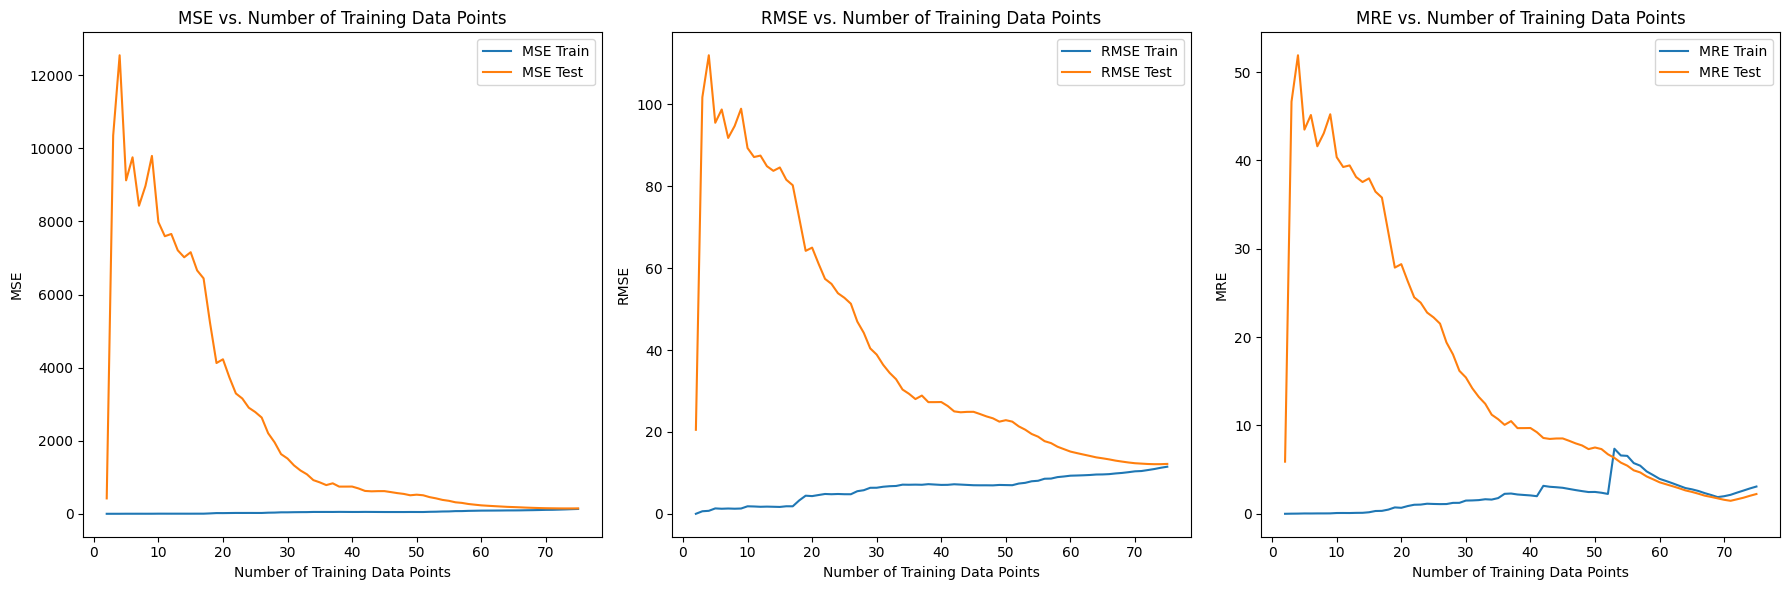

In [52]:


test_size = int(0.25 * len(x_data))
test_indices = np.random.choice(len(x_data), size=test_size, replace=False)
train_indices = np.setdiff1d(np.arange(len(x_data)), test_indices)

x_train, y_train = x_data[train_indices], y_data[train_indices]
x_test, y_test = x_data[test_indices], y_data[test_indices]

X_train = x_train.reshape(-1, 1)
X_test = x_test.reshape(-1, 1)
Y_train = y_train.reshape(-1, 1)
Y_test = y_test.reshape(-1, 1)

mse_train_list = []
rmse_train_list = []
mse_test_list = []
rmse_test_list = []
mre_train_list = []
mre_test_list = []

for i in range(1, len(X_train) + 1):
    X_train_subset = X_train[:i]
    Y_train_subset = Y_train[:i]

    x_mean_train = np.mean(X_train_subset)
    y_mean_train = np.mean(Y_train_subset)

    numerator = np.sum((X_train_subset - x_mean_train) * (Y_train_subset - y_mean_train))
    denominator = np.sum((X_train_subset - x_mean_train) ** 2)
    w = numerator / denominator
    b = y_mean_train - w * x_mean_train

    y_train_pred = w * X_train_subset + b
    y_test_pred = w * X_test + b

    mse_train = np.mean((Y_train_subset - y_train_pred) ** 2)
    mse_test = np.mean((Y_test - y_test_pred) ** 2)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    mre_train = np.mean(np.abs((Y_train_subset - y_train_pred) / Y_train_subset))
    mre_test = np.mean(np.abs((Y_test - y_test_pred) / Y_test))

    mse_train_list.append(mse_train)
    rmse_train_list.append(rmse_train)
    mse_test_list.append(mse_test)
    rmse_test_list.append(rmse_test)
    mre_train_list.append(mre_train)
    mre_test_list.append(mre_test)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(X_train) + 1), mse_train_list, label='MSE Train')
plt.plot(range(1, len(X_train) + 1), mse_test_list, label='MSE Test')
plt.xlabel('Number of Training Data Points')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs. Number of Training Data Points')

plt.subplot(1, 3, 2)
plt.plot(range(1, len(X_train) + 1), rmse_train_list, label='RMSE Train')
plt.plot(range(1, len(X_train) + 1), rmse_test_list, label='RMSE Test')
plt.xlabel('Number of Training Data Points')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs. Number of Training Data Points')

plt.subplot(1, 3, 3)
plt.plot(range(1, len(X_train) + 1), mre_train_list, label='MRE Train')
plt.plot(range(1, len(X_train) + 1), mre_test_list, label='MRE Test')
plt.xlabel('Number of Training Data Points')
plt.ylabel('MRE')
plt.legend()
plt.title('MRE vs. Number of Training Data Points')

plt.tight_layout()
plt.show()


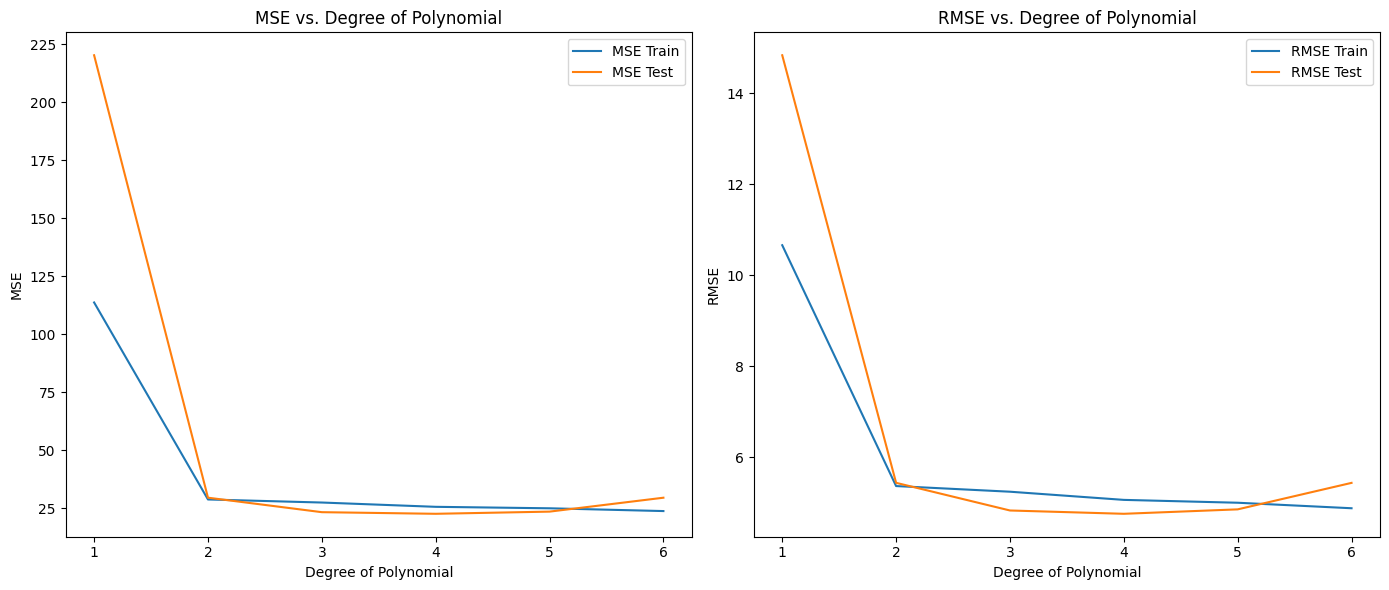

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

x_train, y_train = x_data[train_indices], y_data[train_indices]
x_test, y_test = x_data[test_indices], y_data[test_indices]

mse_train_list = []
rmse_train_list = []
mse_test_list = []
rmse_test_list = []

for degree in range(1, 7):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly_features.transform(x_test.reshape(-1, 1))

    w = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train.reshape(-1, 1)

    y_train_pred = X_train_poly @ w
    y_test_pred = X_test_poly @ w

    mse_train = np.mean((y_train.reshape(-1, 1) - y_train_pred) ** 2)
    mse_test = np.mean((y_test.reshape(-1, 1) - y_test_pred) ** 2)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    mse_train_list.append(mse_train)
    rmse_train_list.append(rmse_train)
    mse_test_list.append(mse_test)
    rmse_test_list.append(rmse_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 7), mse_train_list, label='MSE Train')
plt.plot(range(1, 7), mse_test_list, label='MSE Test')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs. Degree of Polynomial')

plt.subplot(1, 2, 2)
plt.plot(range(1, 7), rmse_train_list, label='RMSE Train')
plt.plot(range(1, 7), rmse_test_list, label='RMSE Test')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs. Degree of Polynomial')

plt.tight_layout()
plt.show()

